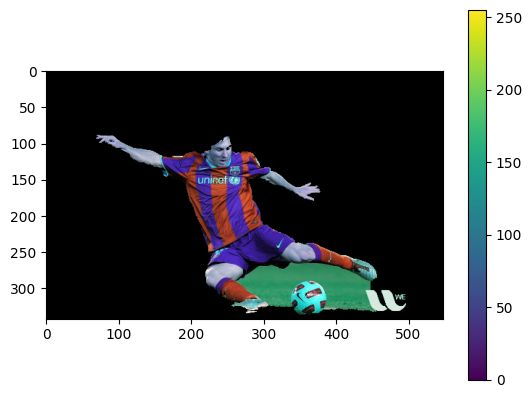

(<matplotlib.image.AxesImage at 0x1b66c40ce80>,
 None)

In [1]:
#Graph Cut

import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('images/messi5.jpg')
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,450,290)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

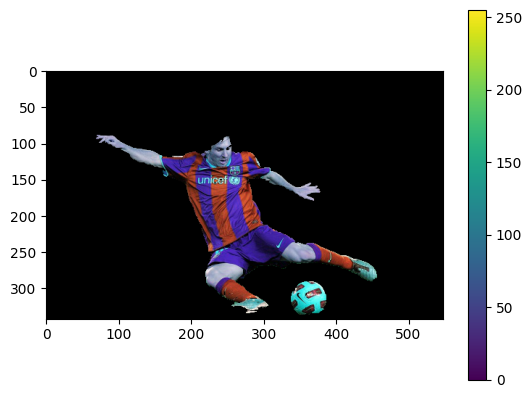

(<matplotlib.image.AxesImage at 0x1b66d7a2490>,
 None)

In [6]:
# newmask is the mask image I manually labelled
newmask = cv2.imread('images/newmask.png',0)

width = int(img.shape[1])
height = int(img.shape[0])
dim = (width, height)
  
# resize image
resized = cv2.resize(newmask, dim, interpolation = cv2.INTER_AREA)

newmask=resized

   # whereever it is marked white (sure foreground), change mask=1
   # whereever it is marked black (sure background), change mask=0
mask[newmask == 0] = 0
mask[newmask == 255] = 1

mask, bgdModel, fgdModel = cv2.grabCut(img,mask,None,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_MASK)

mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

In [4]:
width = int(img.shape[1])
height = int(img.shape[0])
dim = (width, height)
  
# resize image
resized = cv2.resize(newmask, dim, interpolation = cv2.INTER_AREA)

In [5]:
resized.shape

(342, 548)